In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn.discriminant_analysis
import sklearn.neighbors as neighbors

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn import cross_validation
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale

#Trees
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

#Preprocessing packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer #One hot encoding
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

#Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Metrics
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image 

#Bootstrap
from sklearn.utils import resample

#Neural networks and scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier

#SVM
from sklearn import svm

%matplotlib inline

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_json('train_data.json')
train = train.drop(['index'], axis = 1)
train = train.drop(['level_0'], axis = 1)
pd.options.display.max_columns = None
train.describe()

,Balcony,Cats Allowed,Common Outdoor Space,Dining Room,Dishwasher,Dogs Allowed,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry In Building,Laundry in Building,Laundry in Unit,Loft,New Construction,No Fee,Outdoor Space,Pre-War,Roof Deck,Swimming Pool,Terrace,Wheelchair Access,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,4.191800e+04,41918.000000,4.191800e+04
mean,0.061239,0.478052,0.026170,0.104299,0.413068,0.447373,0.422515,0.524953,0.044372,0.270123,0.039386,0.476048,0.087313,0.052674,0.331433,0.177155,0.042702,0.052078,0.366191,0.106780,0.185147,0.132688,0.055966,0.046376,0.027745,1.211950,1.537621,40.742705,7.024133e+06,-73.957629,3.829015e+03
std,0.239770,0.499524,0.159643,0.305652,0.492391,0.497229,0.493966,0.499383,0.205923,0.444028,0.194515,0.499432,0.282297,0.223385,0.470734,0.381805,0.202188,0.222187,0.481768,0.308837,0.388422,0.339241,0.229860,0.210301,0.164242,0.502177,1.114057,0.600334,1.260963e+05,1.110224,2.334703e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,40.728300,6.916416e+06,-73.991700,2.495000e+03
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,40.751800,7.021090e+06,-73.977900,3.150000e+03
75%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,40.774300,7.128524e+06,-73.954700,4.100000e+03
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,8.000000,44.603800,7.753784e+06,0.000000,4.490000e+06


# Data Exploration and Pre-Processing

In [3]:
def medium_high (row):
    v = row['interest_level']
    if v == 'medium':
        return 'medium/high'
    elif v == 'high':
        return 'medium/high'
    else:
        return 'low'
    
train['new_interest_level'] = train.apply(medium_high, axis = 1)
train.head()

,Balcony,Cats Allowed,Common Outdoor Space,Dining Room,Dishwasher,Dogs Allowed,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry In Building,Laundry in Building,Laundry in Unit,Loft,New Construction,No Fee,Outdoor Space,Pre-War,Roof Deck,Swimming Pool,Terrace,Wheelchair Access,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,new_interest_level
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium/high
1,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,low
10,0,0,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,3,a36895b9975c6991ca0fa1d9a99023a1,2016-04-15 05:54:43,"Upper east side ,Flex three bedroom in a doorm...",East 72nd Street,"[Doorman, Elevator, Fitness Center, Laundry in...",low,40.7695,6878679,-73.9603,781c05e464ce94eaa436401d07f2a6cc,[https://photos.renthop.com/2/6878679_b53fe0cc...,5200,200 East 72nd Street,low
100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,1,0,2016-04-26 01:14:31,"Upper West Side, desirable location junior 4, ...",West 82nd Street,[Pre-War],low,40.7845,6923817,-73.9760,096ce7507f4f3678b32780d20bfab49f,[],3995,150 West 82nd Street,low
1000,0,1,0,0,1,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1.0,0,62772db889c5fd564f47eb5d46e64e4e,2016-06-02 04:12:07,"Massive Studio Located in the 86st, Very close...",E 86 St.,"[Doorman, Elevator, Laundry in Unit, High Spee...",low,40.7771,7097593,-73.9505,7b392b11d691f65a71e58a3f76aaf04e,[https://photos.renthop.com/2/7097593_b437c54a...,2300,336 E 86 St.,low


In [4]:
outdoor_space = train[train['Outdoor Space'] == train['Common Outdoor Space']]
outdoor_space.describe()

,Balcony,Cats Allowed,Common Outdoor Space,Dining Room,Dishwasher,Dogs Allowed,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry In Building,Laundry in Building,Laundry in Unit,Loft,New Construction,No Fee,Outdoor Space,Pre-War,Roof Deck,Swimming Pool,Terrace,Wheelchair Access,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,36385.000000,36385.000000,36385.000000,36385.000000,36385.000000,36385.000000,36385.000000,36385.000000,36385.000000,36385.000000,36385.000000,36385.000000,36385.000000,36385.000000,36385.000000,36385.000000,36385.000000,36385.000000,36385.000000,36385.000000,36385.000000,36385.000000,36385.000000,36385.000000,36385.000000,36385.000000,36385.000000,36385.000000,3.638500e+04,36385.000000,3.638500e+04
mean,0.025697,0.465961,0.000550,0.071980,0.365975,0.435207,0.379717,0.482809,0.046695,0.226687,0.011323,0.435124,0.067913,0.034217,0.295864,0.147946,0.038807,0.041171,0.325271,0.000550,0.192195,0.107132,0.044414,0.011406,0.022509,1.182644,1.483194,40.743342,7.024624e+06,-73.956143,3.732932e+03
std,0.158233,0.498847,0.023439,0.258459,0.481709,0.495791,0.485323,0.499711,0.210988,0.418694,0.105808,0.495780,0.251599,0.181790,0.456436,0.355051,0.193138,0.198688,0.468483,0.023439,0.394031,0.309285,0.206016,0.106189,0.148335,0.468544,1.092747,0.607147,1.253797e+05,1.126614,2.502889e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,40.729000,6.916661e+06,-73.990400,2.400000e+03
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,40.753000,7.022708e+06,-73.976900,3.000000e+03
75%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,40.775600,7.130046e+06,-73.953900,3.995000e+03
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,8.000000,42.345900,7.753784e+06,0.000000,4.490000e+06


In [5]:
# Union of 'Outdooor Space' and 'Common Outdoor Space' features
train['Outdoor Space/Common Outdoor Space'] = [train['Outdoor Space'][x] | train['Common Outdoor Space'][x] for x in range(len(train))]

In [6]:
# Union of 'Laundry in Building' and 'Laundry In Building' features
train['New Laundry in Building'] = [train['Laundry in Building'][x] | train['Laundry In Building'][x] for x in range(len(train))]

In [7]:
# Union of 'Cats Allowed' and 'Dogs Allowed' features
train['Pets Allowed'] = [train['Cats Allowed'][x] | train['Dogs Allowed'][x] for x in range(len(train))]

In [8]:
# Union of 'Balcony' and 'Terrace' features
train['Balcony/Terrace'] = [train['Balcony'][x] | train['Terrace'][x] for x in range(len(train))]

In [9]:
# Since the minimum price is very small (43) and the maximum price is very large (around 1,000,000), we decided to 
# apply a log transformation of the price
train['log_price'] = [np.log(price) for price in train['price']]

In [10]:
train['num_photos'] = [len(photos) for photos in train['photos']]

In [11]:
# Instead of keeping the 'description' variable as an string, simply count how many words are in the string and make 
# a new variable.
train['description_length'] = [len(description.split()) for description in train['description']]

In [12]:
# New feature based on the 'created' feature
train['created_month'] = [int(created.split("-")[1]) for created in train['created']]

In [13]:
# New feature based on the 'created' feature
train['created_day'] = [int(created.split("-")[2].split()[0]) for created in train['created']]

In [14]:
# New feature based on the 'created' feature
train['created_hour'] = [int(created.split("-")[2].split()[1].split(":")[0]) for created in train['created']]

In [15]:
# Instead of keeping the 'features' variable as an array, simply count how many elements are in the array and make 
# a new variable.
train['num_features'] = [len(features) for features in train['features']]

In [16]:
# New feature price/bedroom
train['price_per_bed'] = [train['price'][x] / train['bedrooms'][x] if train['bedrooms'][x] > 0 else train['price'][x] for x in range(len(train))]

In [17]:
# New feature price/bathroom
train['price_per_bath'] = [train['price'][x] / train['bathrooms'][x] if train['bathrooms'][x] > 0 else train['price'][x] for x in range(len(train))]

In [18]:
# New feature price/room = price/(bedrooms + bathrooms)
train['price_per_room'] = [train['price'][x] / (train['bathrooms'][x] + train['bedrooms'][x]) if (train['bathrooms'][x] > 0 or train['bedrooms'][x] > 0) else train['price'][x] for x in range(len(train))]

In [19]:
# This is the final data frame that we will use to train the model
train_final = train.drop(['Balcony'], axis = 1)
train_final = train_final.drop(['Cats Allowed'], axis = 1)
train_final = train_final.drop(['Common Outdoor Space'], axis = 1)
train_final = train_final.drop(['Dogs Allowed'], axis = 1)
train_final = train_final.drop(['Laundry In Building'], axis = 1)
train_final = train_final.drop(['Laundry in Building'], axis = 1)
train_final = train_final.drop(['Outdoor Space'], axis = 1)
train_final = train_final.drop(['building_id'], axis = 1)
train_final = train_final.drop(['created'], axis = 1)
train_final = train_final.drop(['description'], axis = 1)
train_final = train_final.drop(['display_address'], axis = 1)
train_final = train_final.drop(['features'], axis = 1)
train_final = train_final.drop(['Terrace'], axis = 1)
train_final = train_final.drop(['listing_id'], axis = 1)
train_final = train_final.drop(['manager_id'], axis = 1)
train_final = train_final.drop(['photos'], axis = 1)
train_final = train_final.drop(['street_address'], axis = 1)
train_final = train_final.drop(['price'], axis = 1)
train_final.head()

,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,interest_level,latitude,longitude,new_interest_level,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,3,medium,40.7145,-73.9425,medium/high,0,0,0,0,8.006368,5,93,6,24,7,0,1000.0,2000.0,666.666667
1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,2,low,40.7947,-73.9667,low,0,0,1,0,8.606119,11,0,6,12,12,5,2732.5,5465.0,1821.666667
10,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1.0,3,low,40.7695,-73.9603,low,0,0,0,0,8.556414,5,46,4,15,5,6,1950.0,1950.0,1950.000000
100,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0,1,low,40.7845,-73.9760,low,0,0,0,0,8.292799,0,13,4,26,1,1,1000.0,2000.0,666.666667
1000,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1.0,0,low,40.7771,-73.9505,low,0,1,1,0,7.740664,3,90,6,2,4,7,3275.0,3275.0,1637.500000


In [20]:
# For interest_level in train_final: 2 is medium, 1 is low, 0 is high
# For new_interest_level in train_final: 0 is low, 1 is medium/high
encoder = sklearn.preprocessing.OneHotEncoder()
label_encoder = sklearn.preprocessing.LabelEncoder()
data_label_encoded = label_encoder.fit_transform(train_final['interest_level'])
train_final['interest_level'] = data_label_encoded

encoder = sklearn.preprocessing.OneHotEncoder()
label_encoder = sklearn.preprocessing.LabelEncoder()
data_label_encoded = label_encoder.fit_transform(train_final['new_interest_level'])
train_final['new_interest_level'] = data_label_encoded

train_final.head()

,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,interest_level,latitude,longitude,new_interest_level,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,3,2,40.7145,-73.9425,1,0,0,0,0,8.006368,5,93,6,24,7,0,1000.0,2000.0,666.666667
1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,2,1,40.7947,-73.9667,0,0,0,1,0,8.606119,11,0,6,12,12,5,2732.5,5465.0,1821.666667
10,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1.0,3,1,40.7695,-73.9603,0,0,0,0,0,8.556414,5,46,4,15,5,6,1950.0,1950.0,1950.000000
100,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0,1,1,40.7845,-73.9760,0,0,0,0,0,8.292799,0,13,4,26,1,1,1000.0,2000.0,666.666667
1000,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1.0,0,1,40.7771,-73.9505,0,0,1,1,0,7.740664,3,90,6,2,4,7,3275.0,3275.0,1637.500000


Split the final dataset into training and testing. Since the test set has 7434 observations and the training set has 41918, we decided to split our dataset into two randomly drawn sets s.t. the test set has a proportion of 0.18.

In [21]:
train_final_training, train_final_testing = train_test_split(train_final, test_size = 0.18, random_state = 42)
train_final_training.describe()

,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,interest_level,latitude,longitude,new_interest_level,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room
count,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,3.437200e+04,3.437200e+04,3.437200e+04
mean,0.104329,0.412836,0.423804,0.525719,0.044455,0.272722,0.038927,0.475998,0.087397,0.177005,0.042302,0.052746,0.366112,0.184918,0.133859,0.056529,0.027726,1.211160,1.536454,1.148551,40.740718,-73.954664,0.305598,0.132899,0.379175,0.478616,0.081811,8.098574,5.607849,87.797131,5.011725,15.200134,4.759048,5.446730,2.466304e+03,3.205532e+03,1.588654e+03
std,0.305691,0.492351,0.494167,0.499345,0.206106,0.445366,0.193424,0.499431,0.282420,0.381678,0.201280,0.223530,0.481748,0.388237,0.340506,0.230943,0.164189,0.500964,1.113648,0.532483,0.662424,1.225618,0.460667,0.339470,0.485189,0.499550,0.274080,0.434286,3.625332,58.812416,0.824268,8.281180,4.180524,3.940664,1.382508e+04,2.567392e+04,8.889989e+03
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-118.271000,0.000000,0.000000,0.000000,0.000000,0.000000,3.761200,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,4.300000e+01,4.300000e+01,4.300000e+01
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,40.728100,-73.991800,0.000000,0.000000,0.000000,0.000000,0.000000,7.822044,4.000000,48.000000,4.000000,8.000000,2.000000,2.000000,1.595000e+03,2.337500e+03,1.000000e+03
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,40.751800,-73.977900,0.000000,0.000000,0.000000,0.000000,0.000000,8.055158,5.000000,81.000000,5.000000,15.000000,3.000000,5.000000,2.150000e+03,2.850000e+03,1.310000e+03
75%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,40.774425,-73.954700,1.000000,0.000000,1.000000,1.000000,0.000000,8.318742,7.000000,118.000000,6.000000,22.000000,5.000000,8.000000,2.895000e+03,3.495000e+03,1.866667e+03
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,8.000000,2.000000,44.603800,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.317363,46.000000,663.000000,6.000000,31.000000,23.000000,39.000000,2.245000e+06,4.490000e+06,1.496667e+06


In [22]:
train_medium_high = train_final_training[train_final_training['new_interest_level'] != 0]

# Random Forests

In [23]:
train_low = train_final_training
train_low_X = train_low.drop(['new_interest_level'], axis = 1)
train_low_X = train_low_X.drop(['interest_level'], axis = 1)
train_low_Y = train_low['new_interest_level']

In [25]:
X_final_training = train_final_training.drop(['interest_level'], axis=1)
X_final_training = X_final_training.drop(['new_interest_level'], axis=1)
y_final_training = train_final_training['new_interest_level']

In [141]:
# Random forest
clf_sqrt = RandomForestClassifier(warm_start=False, 
                             oob_score=True,
                             max_features="sqrt",
                             random_state = 1, n_estimators = 1000)


#clf_sqrt.fit(X_final_training, y_final_training)

In [148]:
#clf_sqrt.predict()
scores = cross_val_score(clf_sqrt, X_final_training, y_final_training, cv=3)
expected_test_acc = np.mean(scores)
expected_test_acc

0.71694973432238795

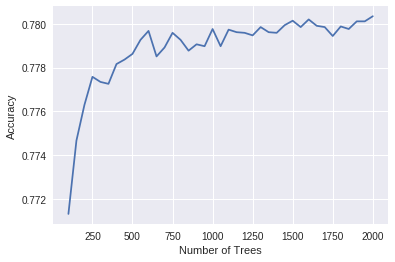

In [89]:
#First lets explore the number of trees
error_rate_sqrt = np.array([])
num_trees_sqrt = np.array([])

error_rate_bag = np.array([])
num_trees_bag = np.array([])

min_trees = 100
max_trees = 2001


#clf_bagging = RandomForestClassifier(warm_start=False, 
 #                            oob_score=True,
  #                           max_features=None,
   #                          random_state = 1)
    
#x = np.arange(min_trees,max_trees+1,10)
    
for i in np.arange(min_trees,max_trees+1,50):
    clf_sqrt.set_params(n_estimators=i)
    clf_sqrt.fit(train_low_X, train_low_Y)
    error_rate_sqrt = np.append(error_rate_sqrt,clf_sqrt.oob_score_)
    num_trees_sqrt = np.append(num_trees_sqrt,i)
    
    #clf_bagging.set_params(n_estimators=i)
    #clf_bagging.fit(X_train, y_train)
    #error_rate_bag = np.append(error_rate_bag,clf_bagging.oob_score_)
    #num_trees_bag = np.append(num_trees_bag,i)

plt.plot(num_trees_sqrt,error_rate_sqrt);
#plt.plot(num_trees_bag,error_rate_bag,c='red');
plt.xlabel('Number of Trees');
plt.ylabel('Accuracy');

From the plot above, we chose the optimal number of trees for the random forest as 1000. This random forest classifier differentiates between the low-interest listings and the rest of the listings. We will first run the data through this classifier, then we will take the set of points classified as not low and run a model to see which are medium and which are high.

## Neural Networks
Now we scale the X data in order to run a neural network

In [26]:
scaler = StandardScaler()
X_train_NN = train_final_training.drop(['interest_level'], axis = 1)
X_train_NN = X_train_NN.drop(['new_interest_level'], axis = 1)

y_train_NN = train_final_training['new_interest_level'];

X_train_NN.describe()

,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,latitude,longitude,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room
count,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,3.437200e+04,3.437200e+04,3.437200e+04
mean,0.104329,0.412836,0.423804,0.525719,0.044455,0.272722,0.038927,0.475998,0.087397,0.177005,0.042302,0.052746,0.366112,0.184918,0.133859,0.056529,0.027726,1.211160,1.536454,40.740718,-73.954664,0.132899,0.379175,0.478616,0.081811,8.098574,5.607849,87.797131,5.011725,15.200134,4.759048,5.446730,2.466304e+03,3.205532e+03,1.588654e+03
std,0.305691,0.492351,0.494167,0.499345,0.206106,0.445366,0.193424,0.499431,0.282420,0.381678,0.201280,0.223530,0.481748,0.388237,0.340506,0.230943,0.164189,0.500964,1.113648,0.662424,1.225618,0.339470,0.485189,0.499550,0.274080,0.434286,3.625332,58.812416,0.824268,8.281180,4.180524,3.940664,1.382508e+04,2.567392e+04,8.889989e+03
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-118.271000,0.000000,0.000000,0.000000,0.000000,3.761200,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,4.300000e+01,4.300000e+01,4.300000e+01
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,40.728100,-73.991800,0.000000,0.000000,0.000000,0.000000,7.822044,4.000000,48.000000,4.000000,8.000000,2.000000,2.000000,1.595000e+03,2.337500e+03,1.000000e+03
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,40.751800,-73.977900,0.000000,0.000000,0.000000,0.000000,8.055158,5.000000,81.000000,5.000000,15.000000,3.000000,5.000000,2.150000e+03,2.850000e+03,1.310000e+03
75%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,40.774425,-73.954700,0.000000,1.000000,1.000000,0.000000,8.318742,7.000000,118.000000,6.000000,22.000000,5.000000,8.000000,2.895000e+03,3.495000e+03,1.866667e+03
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,8.000000,44.603800,0.000000,1.000000,1.000000,1.000000,1.000000,15.317363,46.000000,663.000000,6.000000,31.000000,23.000000,39.000000,2.245000e+06,4.490000e+06,1.496667e+06


We want to try two models: a NN to classify lows versus the rest of the observations, and another NN to classify mediums versus highs.

In [27]:
train_medium_high = train_final_training[train_final_training['new_interest_level'] != 0]

X_train_medhigh_NN = train_medium_high.drop(['interest_level'], axis = 1)
X_train_medhigh_NN = X_train_medhigh_NN.drop(['new_interest_level'], axis = 1)

y_train_medhigh_NN = train_medium_high['interest_level'];

X_train_medhigh_NN.describe()

,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,latitude,longitude,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room
count,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.00000,1.050400e+04,1.050400e+04,10504.000000
mean,0.124334,0.473819,0.373096,0.526561,0.046173,0.248667,0.048172,0.581112,0.109577,0.191927,0.047601,0.058644,0.467346,0.164414,0.147372,0.058835,0.030369,1.150276,1.595678,40.748925,-73.969762,0.136615,0.383473,0.481626,0.082730,7.945817,5.807026,93.693736,5.005998,14.812452,5.763899,5.70497,2.474484e+03,3.126630e+03,1588.410771
std,0.329977,0.499338,0.483650,0.499318,0.209869,0.432261,0.214140,0.493400,0.312377,0.393835,0.212930,0.234969,0.498956,0.370668,0.354494,0.235326,0.171610,0.377033,1.115608,0.058166,0.037191,0.343456,0.486255,0.499686,0.275487,0.368624,2.691753,54.150720,0.822342,8.358087,4.657297,4.14978,1.055542e+04,1.054704e+04,5420.425216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.506500,-75.177300,0.000000,0.000000,0.000000,0.000000,6.543912,0.000000,0.000000,4.000000,1.000000,0.000000,0.00000,3.062500e+02,4.083333e+02,175.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,40.725100,-73.991500,0.000000,0.000000,0.000000,0.000000,7.696213,4.000000,56.000000,4.000000,7.000000,3.000000,2.00000,1.600000e+03,2.333333e+03,1000.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,40.748100,-73.977900,0.000000,0.000000,0.000000,0.000000,7.922442,5.000000,87.000000,5.000000,15.000000,5.000000,5.00000,2.166583e+03,2.850000e+03,1325.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,40.773000,-73.952100,0.000000,1.000000,1.000000,0.000000,8.160518,7.000000,123.000000,6.000000,22.000000,6.000000,8.00000,2.900000e+03,3.500000e+03,1895.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,6.000000,44.603800,-73.714200,1.000000,1.000000,1.000000,1.000000,9.615805,28.000000,507.000000,6.000000,31.000000,23.000000,39.00000,1.070000e+06,1.070000e+06,535000.000000


In [28]:
test_medium_high = train_final_testing[train_final_testing['new_interest_level'] != 0]

X_test_medhigh_NN = test_medium_high.drop(['interest_level'], axis = 1)
X_test_medhigh_NN = X_test_medhigh_NN.drop(['new_interest_level'], axis = 1)

y_test_medhigh_NN = test_medium_high['interest_level'];

X_test_medhigh_NN.describe()

,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,latitude,longitude,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room
count,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.00000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.00000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000
mean,0.127922,0.484341,0.372298,0.535951,0.042788,0.244817,0.04764,0.591972,0.108513,0.188355,0.053816,0.060432,0.486546,0.177327,0.146449,0.05558,0.031760,1.155712,1.622408,40.749892,-73.969946,0.129687,0.372739,0.490516,0.077636,7.955745,5.792678,93.720776,5.021614,14.810322,5.779003,5.742832,2341.211888,2993.031632,1521.427737
std,0.334077,0.499865,0.483524,0.498816,0.202423,0.430073,0.21305,0.491577,0.311096,0.391081,0.225703,0.238339,0.499929,0.382029,0.353634,0.22916,0.175399,0.383654,1.137653,0.043629,0.033923,0.336033,0.483640,0.500020,0.267656,0.384532,2.622343,56.470584,0.821689,8.372412,4.678653,4.124233,1070.440972,1024.195548,753.524809
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,40.575800,-74.222400,0.000000,0.000000,0.000000,0.000000,6.543912,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,375.750000,375.750000,187.875000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,40.727400,-73.991500,0.000000,0.000000,0.000000,0.000000,7.696213,4.000000,56.000000,4.000000,7.000000,3.000000,3.000000,1562.500000,2311.500000,1004.875000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,2.000000,40.749100,-73.977900,0.000000,0.000000,0.000000,0.000000,7.921173,5.000000,86.000000,5.000000,14.000000,5.000000,5.000000,2150.000000,2850.000000,1312.500000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,2.000000,40.771850,-73.952800,0.000000,1.000000,1.000000,0.000000,8.186603,7.000000,120.500000,6.000000,22.000000,6.000000,8.000000,2896.250000,3500.000000,1900.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,4.000000,6.000000,40.915400,-73.714200,1.000000,1.000000,1.000000,1.000000,11.618285,20.000000,498.000000,6.000000,30.000000,23.000000,26.000000,15000.000000,15000.000000,15000.000000


In [29]:
# Fit only to the training data
scaler.fit(X_train_NN)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train_NN = scaler.transform(X_train_NN)

In [30]:
# Fit only to the training data
scaler.fit(X_train_medhigh_NN)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train_medhigh_NN = scaler.transform(X_train_medhigh_NN)

In [31]:
# Fit only to the training data
scaler.fit(X_test_medhigh_NN)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_test_medhigh_NN = scaler.transform(X_test_medhigh_NN)

We define the multi-layer perceptron (neural network model) and then fit the data.
The upper bound for the number of units in the hidden layer to avoid overfitting is given by:

Nh=Ns/(α∗(Ni+No)), where Nh=number of neurons in hidden layer, Ns=number of samples in training set, α=5, Ni=number of input neurons, No=number of output neurons

(10504)/(5*(36+2)=55.22 so we ill use 55 neurons in the hidden layer.

In [32]:
mlp = MLPClassifier(hidden_layer_sizes=(55,),max_iter=1000,activation='logistic',solver='lbfgs',alpha=1e-5)

In [33]:
mlp.fit(X_train_medhigh_NN, y_train_medhigh_NN)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(55,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [34]:
predictions_NN = mlp.predict(X_test_medhigh_NN)
print(confusion_matrix(y_test_medhigh_NN, predictions_NN))
print('Accuracy = ',mlp.score(X_test_medhigh_NN, y_test_medhigh_NN))

[[ 234  347]
 [ 480 1206]]
Accuracy =  0.635200705779


Clearly from the results above, neural networks are very prone to overfitting. This is due to the complexity of such models. We will run cross validation in order to prove that the expected test accuracy of NN is low.

In [119]:
scores = cross_val_score(mlp, X_train_medhigh_NN, y_train_medhigh_NN, cv=10)
expected_test_acc = np.mean(scores)
expected_test_acc

0.74609809308109087

# KNN

Here is our attempt to implement KNN. We must run cross-validation on the model to estimate test accuracy and find the optimal k.

In [90]:
# KNN
X_train_knn = train_final.drop(['interest_level'], axis = 1)
X_train_knn = X_train_knn.drop(['new_interest_level'], axis = 1)

y_train_knn = train_final['new_interest_level'];

knn=neighbors.KNeighborsClassifier(n_neighbors=2)

scores = cross_val_score(knn, X_train_knn, y_train_knn, cv=3)
expected_test_acc = np.mean(scores)
expected_test_acc

0.67190704658576783

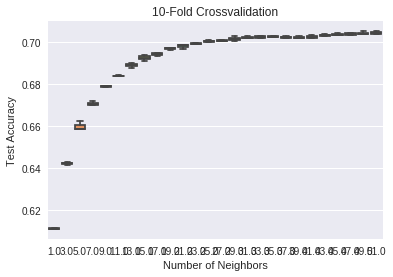

In [92]:
X_train_knn = train_final.drop(['interest_level'], axis = 1)
X_train_knn = X_train_knn.drop(['new_interest_level'], axis = 1)

y_train_knn = train_final['new_interest_level'];

# Create the knn model.
val_array = np.arange(0, 51, 2)

score = np.array([])
k_values = np.array([])

for trial in range(3):
    cv_method = KFold(n_splits=10,shuffle=True,random_state = trial)
    for k in val_array:
        k_values = np.append(k_values,k+1)
        knnmodel = neighbors.KNeighborsClassifier(n_neighbors = k+1)
        error = np.mean(cross_val_score(knnmodel,X_train_knn,y_train_knn, cv = cv_method, scoring='accuracy'))
        score = np.append(score,error)
        
sb.boxplot(x = k_values,y = score)
plt.title('10-Fold Crossvalidation')
plt.xlabel('Number of Neighbors')
plt.ylabel('Test Accuracy')

# Downsampling

Since the data is so skewed towards low-interest listings, we thought to downsample the low-interest listings, i.e. to randomly sample 15000 of the 29147 low-interest observations. We then concatenate the sample obtained with the remaining observations, i.e. the meduim and high-interest observations, and treat this new dataset as a training set.

In [63]:
# 29147 of the data points have a low interest level
train_final_low = train_final[train_final['interest_level'] == 1]
train_final_low = train_final_low.reset_index(drop=True)
train_final_rest = train_final[train_final['interest_level'] != 1]
train_final_rest.describe()

,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,interest_level,latitude,longitude,price,new_interest_level,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room
count,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.0,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,1.277100e+04,1.277100e+04,12771.000000
mean,0.124971,0.475687,0.372954,0.528228,0.045572,0.247984,0.048078,0.583040,0.109388,0.191293,0.048704,0.058962,0.470754,0.166706,0.147209,0.058257,0.030616,1.151241,1.600423,1.486336,40.749096,-73.969795,3045.032495,1.0,0.135385,0.381568,0.483204,0.081826,7.947579,5.804479,93.698536,5.008770,14.812074,5.766581,5.711691,2.450827e+03,3.102915e+03,1576.520508
std,0.330699,0.499428,0.483609,0.499222,0.208563,0.431859,0.213939,0.493075,0.312138,0.393334,0.215257,0.235562,0.499163,0.372728,0.354328,0.234238,0.172282,0.378207,1.119555,0.873806,0.055862,0.036631,1561.855788,0.0,0.342148,0.485790,0.499737,0.274110,0.371502,2.679467,54.567468,0.822216,8.360303,4.660915,4.145120,9.583505e+03,9.575012e+03,4926.108212
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.506500,-75.177300,695.000000,1.0,0.000000,0.000000,0.000000,0.000000,6.543912,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,3.062500e+02,3.757500e+02,175.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,40.725700,-73.991500,2200.000000,1.0,0.000000,0.000000,0.000000,0.000000,7.696213,4.000000,56.000000,4.000000,7.000000,3.000000,2.000000,1.597500e+03,2.325000e+03,1000.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,40.748300,-73.977900,2758.000000,1.0,0.000000,0.000000,0.000000,0.000000,7.922261,5.000000,87.000000,5.000000,14.000000,5.000000,5.000000,2.150000e+03,2.850000e+03,1325.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,40.772800,-73.952300,3500.000000,1.0,0.000000,1.000000,1.000000,0.000000,8.160518,7.000000,122.500000,6.000000,22.000000,6.000000,8.000000,2.899500e+03,3.500000e+03,1895.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,6.000000,2.000000,44.603800,-73.714200,111111.000000,1.0,1.000000,1.000000,1.000000,1.000000,11.618285,28.000000,507.000000,6.000000,31.000000,23.000000,39.000000,1.070000e+06,1.070000e+06,535000.000000


In [64]:
# We randomly sample 15000 observations with low interest level
downsampled_train_low = train_final_low.sample(15000, random_state = 7)
downsampled_train_low.head()

,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,interest_level,latitude,longitude,price,new_interest_level,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room
5423,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2,1,40.6529,-73.9565,2292,0,0,0,1,0,7.737180,8,27,5,6,5,7,2490.000000,2490.0,2490.000000
28885,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1.0,2,1,40.7943,-73.9675,3800,0,0,1,0,0,8.242756,1,7,6,9,2,6,2895.000000,2895.0,1447.500000
27391,0,1,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,1.0,3,1,40.7391,-74.0016,6250,0,1,1,1,0,8.740337,4,106,6,14,2,11,1875.000000,3750.0,1250.000000
24234,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1.0,2,1,40.7587,-73.9838,3400,0,0,0,0,0,8.131531,5,71,4,28,4,6,991.666667,2975.0,743.750000
12970,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0,2,1,40.7273,-73.9841,4125,0,0,0,1,0,8.324821,4,280,5,12,2,4,1250.000000,2500.0,833.333333


In [65]:
# We now create a new dataframe with the smaller selection of low interest observations and all of the remaining observations
downsampled_train = pd.concat([downsampled_train_low, train_final_rest])
downsampled_train.describe()

,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,interest_level,latitude,longitude,price,new_interest_level,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room
count,27771.000000,27771.000000,27771.000000,27771.00000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,2.777100e+04,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,2.777100e+04,2.777100e+04,2.777100e+04
mean,0.109899,0.429153,0.409024,0.52508,0.043787,0.265565,0.041842,0.501602,0.093731,0.181196,0.043823,0.053365,0.391271,0.180764,0.136689,0.056030,0.029167,1.198859,1.553275,1.223651,40.743486,-73.960177,3.726262e+03,0.459868,0.134565,0.379389,0.481257,0.081668,8.063983,5.649671,88.854308,5.014187,15.145584,4.979583,5.498542,2.492434e+03,3.252416e+03,1.609837e+03
std,0.312769,0.494964,0.491663,0.49938,0.204624,0.441641,0.200232,0.500006,0.291459,0.385188,0.204704,0.224764,0.488044,0.384830,0.343525,0.229983,0.168278,0.482202,1.118701,0.640206,0.550855,1.032196,2.777298e+04,0.498396,0.341264,0.485244,0.499658,0.273863,0.424219,3.470928,57.917300,0.824027,8.313398,4.303316,3.997536,1.537067e+04,2.855780e+04,9.884606e+03
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-118.271000,6.950000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,6.543912,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,4.300000e+01,4.300000e+01,4.300000e+01
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,40.727600,-73.991700,2.400000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,7.783224,4.000000,50.000000,4.000000,8.000000,2.000000,2.000000,1.587500e+03,2.325000e+03,1.000000e+03
50%,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,40.751200,-73.977900,3.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,8.006368,5.000000,82.000000,5.000000,15.000000,4.000000,5.000000,2.150000e+03,2.850000e+03,1.312500e+03
75%,0.000000,1.000000,1.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,40.774300,-73.954000,3.995000e+03,1.000000,0.000000,1.000000,1.000000,0.000000,8.292799,7.000000,119.000000,6.000000,22.000000,6.000000,8.000000,2.895000e+03,3.495000e+03,1.875000e+03
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,8.000000,2.000000,44.603800,0.000000,4.490000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,15.317363,68.000000,663.000000,6.000000,31.000000,23.000000,39.000000,2.245000e+06,4.490000e+06,1.496667e+06


In [66]:
X_downsampled_train = downsampled_train.drop(['interest_level'], axis = 1)
X_downsampled_train = downsampled_train.drop(['new_interest_level'], axis = 1)
y_downsampled_train = downsampled_train['new_interest_level']

# SVM
We ran cross-validation over a logarithmic range of values for gamma with C=1. Then, when we found the optimal value, we ran cross-validation over a range of values for C with gamma set as the optimal value we found in the previous round.

In [25]:
X_train_svm = train_final.drop(['interest_level'], axis = 1)
X_train_svm = X_train_svm.drop(['new_interest_level'], axis = 1)

y_train_svm = train_final['new_interest_level'];

#clf = svm.SVC(gamma=0.001, C=1)
#clf.fit(X_train_svm, y_train_svm)
## CV over both gamma and C, logarithmic range for gamma, linear and logarithmic for c

In [38]:
X_train_medhigh_SVM = train_medium_high.drop(['interest_level'], axis = 1)
X_train_medhigh_SVM = X_train_medhigh_SVM.drop(['new_interest_level'], axis = 1)

y_train_medhigh_SVM = train_medium_high['interest_level'];

X_train_medhigh_SVM.describe()

,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,latitude,longitude,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room
count,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.00000,1.050400e+04,1.050400e+04,10504.000000
mean,0.124334,0.473819,0.373096,0.526561,0.046173,0.248667,0.048172,0.581112,0.109577,0.191927,0.047601,0.058644,0.467346,0.164414,0.147372,0.058835,0.030369,1.150276,1.595678,40.748925,-73.969762,0.136615,0.383473,0.481626,0.082730,7.945817,5.807026,93.693736,5.005998,14.812452,5.763899,5.70497,2.474484e+03,3.126630e+03,1588.410771
std,0.329977,0.499338,0.483650,0.499318,0.209869,0.432261,0.214140,0.493400,0.312377,0.393835,0.212930,0.234969,0.498956,0.370668,0.354494,0.235326,0.171610,0.377033,1.115608,0.058166,0.037191,0.343456,0.486255,0.499686,0.275487,0.368624,2.691753,54.150720,0.822342,8.358087,4.657297,4.14978,1.055542e+04,1.054704e+04,5420.425216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.506500,-75.177300,0.000000,0.000000,0.000000,0.000000,6.543912,0.000000,0.000000,4.000000,1.000000,0.000000,0.00000,3.062500e+02,4.083333e+02,175.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,40.725100,-73.991500,0.000000,0.000000,0.000000,0.000000,7.696213,4.000000,56.000000,4.000000,7.000000,3.000000,2.00000,1.600000e+03,2.333333e+03,1000.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,40.748100,-73.977900,0.000000,0.000000,0.000000,0.000000,7.922442,5.000000,87.000000,5.000000,15.000000,5.000000,5.00000,2.166583e+03,2.850000e+03,1325.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,40.773000,-73.952100,0.000000,1.000000,1.000000,0.000000,8.160518,7.000000,123.000000,6.000000,22.000000,6.000000,8.00000,2.900000e+03,3.500000e+03,1895.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,6.000000,44.603800,-73.714200,1.000000,1.000000,1.000000,1.000000,9.615805,28.000000,507.000000,6.000000,31.000000,23.000000,39.00000,1.070000e+06,1.070000e+06,535000.000000


In [39]:
X_test_medhigh_SVM = test_medium_high.drop(['interest_level'], axis = 1)
X_test_medhigh_SVM = X_test_medhigh_SVM.drop(['new_interest_level'], axis = 1)

y_test_medhigh_SVM = test_medium_high['interest_level'];

X_test_medhigh_SVM.describe()

,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,latitude,longitude,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room
count,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.00000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.00000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000
mean,0.127922,0.484341,0.372298,0.535951,0.042788,0.244817,0.04764,0.591972,0.108513,0.188355,0.053816,0.060432,0.486546,0.177327,0.146449,0.05558,0.031760,1.155712,1.622408,40.749892,-73.969946,0.129687,0.372739,0.490516,0.077636,7.955745,5.792678,93.720776,5.021614,14.810322,5.779003,5.742832,2341.211888,2993.031632,1521.427737
std,0.334077,0.499865,0.483524,0.498816,0.202423,0.430073,0.21305,0.491577,0.311096,0.391081,0.225703,0.238339,0.499929,0.382029,0.353634,0.22916,0.175399,0.383654,1.137653,0.043629,0.033923,0.336033,0.483640,0.500020,0.267656,0.384532,2.622343,56.470584,0.821689,8.372412,4.678653,4.124233,1070.440972,1024.195548,753.524809
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,40.575800,-74.222400,0.000000,0.000000,0.000000,0.000000,6.543912,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,375.750000,375.750000,187.875000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,40.727400,-73.991500,0.000000,0.000000,0.000000,0.000000,7.696213,4.000000,56.000000,4.000000,7.000000,3.000000,3.000000,1562.500000,2311.500000,1004.875000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,2.000000,40.749100,-73.977900,0.000000,0.000000,0.000000,0.000000,7.921173,5.000000,86.000000,5.000000,14.000000,5.000000,5.000000,2150.000000,2850.000000,1312.500000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,2.000000,40.771850,-73.952800,0.000000,1.000000,1.000000,0.000000,8.186603,7.000000,120.500000,6.000000,22.000000,6.000000,8.000000,2896.250000,3500.000000,1900.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,4.000000,6.000000,40.915400,-73.714200,1.000000,1.000000,1.000000,1.000000,11.618285,20.000000,498.000000,6.000000,30.000000,23.000000,26.000000,15000.000000,15000.000000,15000.000000


In [ ]:
# Provide the range of the hyperparameter grid search
gammas = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
Cs = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 10]

# Initialize the SVM model
svm_model = svm.SVC()

# Run the grid search to find the optimal combination of gamma and C
model_coeffs= []
cv_accuracy= []

for g in gammas:
    for c in Cs:
        svm_model.set_params(gamma=g)
        svm_model.set_params(C = c)
        cv_score = cross_val_score(svm_model, X_train_medhigh_SVM, y_train_medhigh_SVM, cv=4)
        cv_accuracy.append(np.mean(cv_score))
        model_coeff = 'C: ' + str(c) + ', gamma: ' + str(g)
        model_coeffs.append(model_coeff)

print(cv_accuracy, model_coeffs)

We found that the optimal values of gamma and C are 0.00001 and 1, respectively. They give us a cross validation error of around 75% on the classification of mediums and highs. This is the best performing model for the 2nd classification.

In [36]:
clf = svm.SVC(gamma=0.00001, C=1)
#scores = cross_val_score(clf, X_train_medhigh_SVM, y_train_medhigh_SVM, cv=3)
#expected_test_acc = np.mean(scores)
#expected_test_acc

In [40]:
X_train_svm_final = train_final_training.drop(['interest_level'], axis = 1)
X_train_svm_final = X_train_svm_final.drop(['new_interest_level'], axis = 1)

y_train_svm_final = train_final_training['new_interest_level'];

clf.fit(X_train_medhigh_SVM, y_train_medhigh_SVM)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
X_test_svm_final = train_final_testing.drop(['interest_level'], axis = 1)
X_test_svm_final = X_test_svm_final.drop(['new_interest_level'], axis = 1)

y_test_svm_final = train_final_testing['new_interest_level'];

predictions_svm = clf.predict(X_test_medhigh_SVM)
print(confusion_matrix(y_test_medhigh_SVM,predictions_svm))
print('Accuracy = ',clf.score(X_test_medhigh_SVM, y_test_medhigh_SVM))

[[   2  579]
 [   1 1685]]
Accuracy =  0.744155271284


# Logistic regression

In [42]:
train_final_training.describe()

,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,interest_level,latitude,longitude,new_interest_level,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room
count,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,3.437200e+04,3.437200e+04,3.437200e+04
mean,0.104329,0.412836,0.423804,0.525719,0.044455,0.272722,0.038927,0.475998,0.087397,0.177005,0.042302,0.052746,0.366112,0.184918,0.133859,0.056529,0.027726,1.211160,1.536454,1.148551,40.740718,-73.954664,0.305598,0.132899,0.379175,0.478616,0.081811,8.098574,5.607849,87.797131,5.011725,15.200134,4.759048,5.446730,2.466304e+03,3.205532e+03,1.588654e+03
std,0.305691,0.492351,0.494167,0.499345,0.206106,0.445366,0.193424,0.499431,0.282420,0.381678,0.201280,0.223530,0.481748,0.388237,0.340506,0.230943,0.164189,0.500964,1.113648,0.532483,0.662424,1.225618,0.460667,0.339470,0.485189,0.499550,0.274080,0.434286,3.625332,58.812416,0.824268,8.281180,4.180524,3.940664,1.382508e+04,2.567392e+04,8.889989e+03
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-118.271000,0.000000,0.000000,0.000000,0.000000,0.000000,3.761200,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,4.300000e+01,4.300000e+01,4.300000e+01
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,40.728100,-73.991800,0.000000,0.000000,0.000000,0.000000,0.000000,7.822044,4.000000,48.000000,4.000000,8.000000,2.000000,2.000000,1.595000e+03,2.337500e+03,1.000000e+03
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,40.751800,-73.977900,0.000000,0.000000,0.000000,0.000000,0.000000,8.055158,5.000000,81.000000,5.000000,15.000000,3.000000,5.000000,2.150000e+03,2.850000e+03,1.310000e+03
75%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,40.774425,-73.954700,1.000000,0.000000,1.000000,1.000000,0.000000,8.318742,7.000000,118.000000,6.000000,22.000000,5.000000,8.000000,2.895000e+03,3.495000e+03,1.866667e+03
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,8.000000,2.000000,44.603800,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.317363,46.000000,663.000000,6.000000,31.000000,23.000000,39.000000,2.245000e+06,4.490000e+06,1.496667e+06


In [43]:
# Need to work on this. We need mediums as 0's and highs as 1's so that this works. Could yield good accuracy.
train_medium_high.describe()

,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,interest_level,latitude,longitude,new_interest_level,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room
count,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.0,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.00000,1.050400e+04,1.050400e+04,10504.000000
mean,0.124334,0.473819,0.373096,0.526561,0.046173,0.248667,0.048172,0.581112,0.109577,0.191927,0.047601,0.058644,0.467346,0.164414,0.147372,0.058835,0.030369,1.150276,1.595678,1.486101,40.748925,-73.969762,1.0,0.136615,0.383473,0.481626,0.082730,7.945817,5.807026,93.693736,5.005998,14.812452,5.763899,5.70497,2.474484e+03,3.126630e+03,1588.410771
std,0.329977,0.499338,0.483650,0.499318,0.209869,0.432261,0.214140,0.493400,0.312377,0.393835,0.212930,0.234969,0.498956,0.370668,0.354494,0.235326,0.171610,0.377033,1.115608,0.873944,0.058166,0.037191,0.0,0.343456,0.486255,0.499686,0.275487,0.368624,2.691753,54.150720,0.822342,8.358087,4.657297,4.14978,1.055542e+04,1.054704e+04,5420.425216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.506500,-75.177300,1.0,0.000000,0.000000,0.000000,0.000000,6.543912,0.000000,0.000000,4.000000,1.000000,0.000000,0.00000,3.062500e+02,4.083333e+02,175.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,40.725100,-73.991500,1.0,0.000000,0.000000,0.000000,0.000000,7.696213,4.000000,56.000000,4.000000,7.000000,3.000000,2.00000,1.600000e+03,2.333333e+03,1000.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,40.748100,-73.977900,1.0,0.000000,0.000000,0.000000,0.000000,7.922442,5.000000,87.000000,5.000000,15.000000,5.000000,5.00000,2.166583e+03,2.850000e+03,1325.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,40.773000,-73.952100,1.0,0.000000,1.000000,1.000000,0.000000,8.160518,7.000000,123.000000,6.000000,22.000000,6.000000,8.00000,2.900000e+03,3.500000e+03,1895.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,6.000000,2.000000,44.603800,-73.714200,1.0,1.000000,1.000000,1.000000,1.000000,9.615805,28.000000,507.000000,6.000000,31.000000,23.000000,39.00000,1.070000e+06,1.070000e+06,535000.000000


In [44]:
# Mediums are 1's here, highs are 0's
def medium_high_binary (row):
    v = row['interest_level']
    if v == 2:
        return 1
    else:
        return 0
    
train_medium_high['interest_level'] = train_medium_high.apply(medium_high_binary, axis = 1)
test_medium_high['interest_level'] = test_medium_high.apply(medium_high_binary, axis = 1)
train_medium_high.describe()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,interest_level,latitude,longitude,new_interest_level,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room
count,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.0,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.00000,1.050400e+04,1.050400e+04,10504.000000
mean,0.124334,0.473819,0.373096,0.526561,0.046173,0.248667,0.048172,0.581112,0.109577,0.191927,0.047601,0.058644,0.467346,0.164414,0.147372,0.058835,0.030369,1.150276,1.595678,0.743050,40.748925,-73.969762,1.0,0.136615,0.383473,0.481626,0.082730,7.945817,5.807026,93.693736,5.005998,14.812452,5.763899,5.70497,2.474484e+03,3.126630e+03,1588.410771
std,0.329977,0.499338,0.483650,0.499318,0.209869,0.432261,0.214140,0.493400,0.312377,0.393835,0.212930,0.234969,0.498956,0.370668,0.354494,0.235326,0.171610,0.377033,1.115608,0.436972,0.058166,0.037191,0.0,0.343456,0.486255,0.499686,0.275487,0.368624,2.691753,54.150720,0.822342,8.358087,4.657297,4.14978,1.055542e+04,1.054704e+04,5420.425216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.506500,-75.177300,1.0,0.000000,0.000000,0.000000,0.000000,6.543912,0.000000,0.000000,4.000000,1.000000,0.000000,0.00000,3.062500e+02,4.083333e+02,175.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,40.725100,-73.991500,1.0,0.000000,0.000000,0.000000,0.000000,7.696213,4.000000,56.000000,4.000000,7.000000,3.000000,2.00000,1.600000e+03,2.333333e+03,1000.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,40.748100,-73.977900,1.0,0.000000,0.000000,0.000000,0.000000,7.922442,5.000000,87.000000,5.000000,15.000000,5.000000,5.00000,2.166583e+03,2.850000e+03,1325.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,40.773000,-73.952100,1.0,0.000000,1.000000,1.000000,0.000000,8.160518,7.000000,123.000000,6.000000,22.000000,6.000000,8.00000,2.900000e+03,3.500000e+03,1895.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,6.000000,1.000000,44.603800,-73.714200,1.0,1.000000,1.000000,1.000000,1.000000,9.615805,28.000000,507.000000,6.000000,31.000000,23.000000,39.00000,1.070000e+06,1.070000e+06,535000.000000


In [45]:
X_train_medhigh_LR = train_medium_high.drop(['interest_level'], axis = 1)
X_train_medhigh_LR = X_train_medhigh_LR.drop(['new_interest_level'], axis = 1)

y_train_medhigh_LR = train_medium_high['interest_level'];

X_test_medhigh_LR = test_medium_high.drop(['interest_level'], axis = 1)
X_test_medhigh_LR = X_test_medhigh_LR.drop(['new_interest_level'], axis = 1)

y_test_medhigh_LR = test_medium_high['interest_level'];

X_train_medhigh_LR.describe()

,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,latitude,longitude,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room
count,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.000000,10504.00000,1.050400e+04,1.050400e+04,10504.000000
mean,0.124334,0.473819,0.373096,0.526561,0.046173,0.248667,0.048172,0.581112,0.109577,0.191927,0.047601,0.058644,0.467346,0.164414,0.147372,0.058835,0.030369,1.150276,1.595678,40.748925,-73.969762,0.136615,0.383473,0.481626,0.082730,7.945817,5.807026,93.693736,5.005998,14.812452,5.763899,5.70497,2.474484e+03,3.126630e+03,1588.410771
std,0.329977,0.499338,0.483650,0.499318,0.209869,0.432261,0.214140,0.493400,0.312377,0.393835,0.212930,0.234969,0.498956,0.370668,0.354494,0.235326,0.171610,0.377033,1.115608,0.058166,0.037191,0.343456,0.486255,0.499686,0.275487,0.368624,2.691753,54.150720,0.822342,8.358087,4.657297,4.14978,1.055542e+04,1.054704e+04,5420.425216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.506500,-75.177300,0.000000,0.000000,0.000000,0.000000,6.543912,0.000000,0.000000,4.000000,1.000000,0.000000,0.00000,3.062500e+02,4.083333e+02,175.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,40.725100,-73.991500,0.000000,0.000000,0.000000,0.000000,7.696213,4.000000,56.000000,4.000000,7.000000,3.000000,2.00000,1.600000e+03,2.333333e+03,1000.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,40.748100,-73.977900,0.000000,0.000000,0.000000,0.000000,7.922442,5.000000,87.000000,5.000000,15.000000,5.000000,5.00000,2.166583e+03,2.850000e+03,1325.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,40.773000,-73.952100,0.000000,1.000000,1.000000,0.000000,8.160518,7.000000,123.000000,6.000000,22.000000,6.000000,8.00000,2.900000e+03,3.500000e+03,1895.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,6.000000,44.603800,-73.714200,1.000000,1.000000,1.000000,1.000000,9.615805,28.000000,507.000000,6.000000,31.000000,23.000000,39.00000,1.070000e+06,1.070000e+06,535000.000000


In [46]:
X_train_LR = train_final_training.drop(['interest_level'], axis = 1)
X_train_LR = X_train_LR.drop(['new_interest_level'], axis = 1)

y_train_LR = train_final_training['interest_level'];

X_test_LR = train_final_testing.drop(['interest_level'], axis = 1)
X_test_LR = X_test_LR.drop(['new_interest_level'], axis = 1)

y_test_LR = train_final_testing['interest_level'];

X_train_LR.describe()

,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,latitude,longitude,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room
count,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,34372.000000,3.437200e+04,3.437200e+04,3.437200e+04
mean,0.104329,0.412836,0.423804,0.525719,0.044455,0.272722,0.038927,0.475998,0.087397,0.177005,0.042302,0.052746,0.366112,0.184918,0.133859,0.056529,0.027726,1.211160,1.536454,40.740718,-73.954664,0.132899,0.379175,0.478616,0.081811,8.098574,5.607849,87.797131,5.011725,15.200134,4.759048,5.446730,2.466304e+03,3.205532e+03,1.588654e+03
std,0.305691,0.492351,0.494167,0.499345,0.206106,0.445366,0.193424,0.499431,0.282420,0.381678,0.201280,0.223530,0.481748,0.388237,0.340506,0.230943,0.164189,0.500964,1.113648,0.662424,1.225618,0.339470,0.485189,0.499550,0.274080,0.434286,3.625332,58.812416,0.824268,8.281180,4.180524,3.940664,1.382508e+04,2.567392e+04,8.889989e+03
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-118.271000,0.000000,0.000000,0.000000,0.000000,3.761200,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,4.300000e+01,4.300000e+01,4.300000e+01
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,40.728100,-73.991800,0.000000,0.000000,0.000000,0.000000,7.822044,4.000000,48.000000,4.000000,8.000000,2.000000,2.000000,1.595000e+03,2.337500e+03,1.000000e+03
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,40.751800,-73.977900,0.000000,0.000000,0.000000,0.000000,8.055158,5.000000,81.000000,5.000000,15.000000,3.000000,5.000000,2.150000e+03,2.850000e+03,1.310000e+03
75%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,40.774425,-73.954700,0.000000,1.000000,1.000000,0.000000,8.318742,7.000000,118.000000,6.000000,22.000000,5.000000,8.000000,2.895000e+03,3.495000e+03,1.866667e+03
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,8.000000,44.603800,0.000000,1.000000,1.000000,1.000000,1.000000,15.317363,46.000000,663.000000,6.000000,31.000000,23.000000,39.000000,2.245000e+06,4.490000e+06,1.496667e+06


We tried to predict interest level using a multi-class logistic classifier, but got low accuracy.

In [ ]:
LogReg.fit(X_train_LR, y_train_LR)
y_pred1 = LogReg.predict(X_test_LR)

acc1 = 0
for i in range(len(y_pred1)):
    if y_pred1[i] == y_test_LR.iloc[i]:
        acc1 = acc1 + 1

acc1 = acc1/len(y_pred1)
print(acc1)
#confusion_matrix = confusion_matrix(y_test_medhigh_LR, y_pred)
#confusion_matrix
#print(confusion_matrix(y_test_medhigh_LR,y_pred))

In [198]:
X_test_medhigh_LR = X_test_medhigh_LR.drop(['price'], axis = 1)

In [47]:
LogReg = LogisticRegression()
LogReg.fit(X_train_medhigh_LR, y_train_medhigh_LR)
y_pred = LogReg.predict(X_test_medhigh_LR)

acc = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test_medhigh_LR.iloc[i]:
        acc = acc + 1

acc = acc/len(y_pred)
#print(acc)
#len(y_test_medhigh_LR)
#confusion_matrix = confusion_matrix(y_test_medhigh_LR, y_pred)
#confusion_matrix
#print(confusion_matrix(y_test_medhigh_LR,y_pred))

In [48]:
print(acc)

0.7441552712836348


# Predicting on the test data

In [49]:
X_train_RF_final = train_final_training.drop(['interest_level'], axis = 1)
X_train_RF_final = X_train_RF_final.drop(['new_interest_level'], axis = 1)

y_train_RF_final = train_final_training['new_interest_level'];

X_test_RF_final = train_final_testing.drop(['interest_level'], axis = 1)
X_test_RF_final = X_test_RF_final.drop(['new_interest_level'], axis = 1)

y_test_RF_final = train_final_testing['new_interest_level'];

In [50]:
num_lows = len(y_test_RF_final[y_test_RF_final == 0])
num_lows

5279

In [51]:
clf_sqrt = RandomForestClassifier(warm_start=False, 
                             oob_score=True,
                             max_features="sqrt",
                             random_state = 1, n_estimators = 1000)
clf_sqrt.fit(X_train_RF_final, y_train_RF_final)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

In [52]:
predictions_y_rf = clf_sqrt.predict(X_test_RF_final)
acc = 0
for i in range(len(predictions_y_rf)):
    if predictions_y_rf[i] == y_test_RF_final.iloc[i]:
        acc = acc + 1

acc = acc/len(predictions_y_rf)
print(acc)

0.7813411078717201


In [53]:
train_final_testing['random_forest_pred'] = predictions_y_rf
train_final_testing_lows = train_final_testing[train_final_testing['random_forest_pred'] == 0]
train_final_testing_lows['final_pred'] = np.ones(len(train_final_testing_lows))
train_final_testing_lows.describe()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,interest_level,latitude,longitude,new_interest_level,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room,random_forest_pred,final_pred
count,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.000000,6115.0,6115.0
mean,0.098610,0.406051,0.441210,0.527392,0.041537,0.273917,0.036795,0.451186,0.080131,0.183156,0.041374,0.048896,0.332788,0.193132,0.128863,0.054293,0.028782,1.246361,1.567457,1.143745,40.752293,-73.972851,0.203271,0.130172,0.373017,0.477514,0.079150,8.162529,5.556664,86.020605,5.037285,15.530826,4.352739,5.414391,2341.395112,3002.316041,1512.421925,0.0,1.0
std,0.298162,0.491134,0.496572,0.499290,0.199545,0.446003,0.188273,0.497652,0.271518,0.386826,0.199169,0.215669,0.471250,0.394788,0.335076,0.226613,0.167206,0.542080,1.121133,0.427362,0.057338,0.073151,0.402465,0.336520,0.483646,0.499535,0.269994,0.416639,3.910453,60.579531,0.821041,8.290412,3.877207,3.850704,1091.878750,1046.277433,731.734182,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.045000,-75.521400,0.000000,0.000000,0.000000,0.000000,0.000000,7.126087,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,316.666667,375.750000,187.875000,0.0,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,40.729900,-73.991900,0.000000,0.000000,0.000000,0.000000,0.000000,7.882315,4.000000,46.000000,4.000000,8.000000,2.000000,3.000000,1596.900000,2300.000000,1000.000000,0.0,1.0
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,40.753000,-73.978500,0.000000,0.000000,0.000000,0.000000,0.000000,8.101678,5.000000,80.000000,5.000000,16.000000,3.000000,5.000000,2150.000000,2850.000000,1315.000000,0.0,1.0
75%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,40.773100,-73.956600,0.000000,0.000000,1.000000,1.000000,0.000000,8.380686,7.000000,115.000000,6.000000,22.000000,5.000000,8.000000,2850.000000,3499.000000,1876.250000,0.0,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000,2.000000,42.872400,-70.984600,1.000000,1.000000,1.000000,1.000000,1.000000,11.618285,68.000000,498.000000,6.000000,30.000000,23.000000,26.000000,21250.000000,17000.000000,15000.000000,0.0,1.0


In [54]:
classifier_2_testing = train_final_testing[train_final_testing['random_forest_pred'] == 1]

X_classifier_2_testing = classifier_2_testing.drop(['interest_level'], axis = 1)
X_classifier_2_testing = X_classifier_2_testing.drop(['new_interest_level'], axis = 1)
X_classifier_2_testing = X_classifier_2_testing.drop(['random_forest_pred'], axis = 1)

y_classifier_2_testing = train_final_testing['interest_level']

X_classifier_2_testing.describe()

,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,latitude,longitude,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room
count,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000
mean,0.127883,0.448637,0.311670,0.496157,0.054507,0.191474,0.061495,0.583508,0.116003,0.155136,0.058001,0.049616,0.510832,0.156534,0.120894,0.049616,0.023760,1.083857,1.438155,40.749446,-73.963782,0.132075,0.371768,0.490566,0.079665,7.804678,5.656184,89.704403,5.002096,14.124389,6.669462,5.400419,2426.870696,3062.800306,1584.339550
std,0.334076,0.497529,0.463338,0.500160,0.227095,0.393599,0.240321,0.493149,0.320340,0.362161,0.233828,0.217225,0.500057,0.363488,0.326119,0.217225,0.152353,0.286573,1.087847,0.052077,0.039978,0.338691,0.483446,0.500086,0.270868,0.341262,2.459297,50.941513,0.827412,8.293643,5.158919,4.213163,1729.085390,1711.022672,1568.278177
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,40.576500,-74.222400,0.000000,0.000000,0.000000,0.000000,6.543912,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,383.333333,460.000000,209.090909
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,40.721450,-73.987800,0.000000,0.000000,0.000000,0.000000,7.549609,4.000000,57.000000,4.000000,7.000000,3.000000,2.000000,1607.500000,2350.000000,1040.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,40.748800,-73.973900,0.000000,0.000000,0.000000,0.000000,7.781139,5.000000,84.000000,5.000000,13.000000,5.000000,4.000000,2195.000000,2895.000000,1347.500000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,40.777250,-73.948550,0.000000,1.000000,1.000000,0.000000,8.006368,7.000000,114.000000,6.000000,21.000000,6.500000,8.000000,2912.500000,3550.000000,1900.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,40.915400,-73.714200,1.000000,1.000000,1.000000,1.000000,8.922658,20.000000,463.000000,6.000000,30.000000,23.000000,26.000000,53100.000000,53100.000000,53100.000000


In [56]:
predictions_y_medhigh_lr = LogReg.predict(X_classifier_2_testing)
classifier_2_testing['logit_medhigh_pred'] = predictions_y_medhigh_lr
classifier_2_testing.describe()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,interest_level,latitude,longitude,new_interest_level,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room,random_forest_pred,logit_medhigh_pred
count,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.0,1431.000000
mean,0.127883,0.448637,0.311670,0.496157,0.054507,0.191474,0.061495,0.583508,0.116003,0.155136,0.058001,0.049616,0.510832,0.156534,0.120894,0.049616,0.023760,1.083857,1.438155,1.157932,40.749446,-73.963782,0.715584,0.132075,0.371768,0.490566,0.079665,7.804678,5.656184,89.704403,5.002096,14.124389,6.669462,5.400419,2426.870696,3062.800306,1584.339550,1.0,0.976240
std,0.334076,0.497529,0.463338,0.500160,0.227095,0.393599,0.240321,0.493149,0.320340,0.362161,0.233828,0.217225,0.500057,0.363488,0.326119,0.217225,0.152353,0.286573,1.087847,0.831339,0.052077,0.039978,0.451294,0.338691,0.483446,0.500086,0.270868,0.341262,2.459297,50.941513,0.827412,8.293643,5.158919,4.213163,1729.085390,1711.022672,1568.278177,0.0,0.152353
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,40.576500,-74.222400,0.000000,0.000000,0.000000,0.000000,0.000000,6.543912,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,383.333333,460.000000,209.090909,1.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,40.721450,-73.987800,0.000000,0.000000,0.000000,0.000000,0.000000,7.549609,4.000000,57.000000,4.000000,7.000000,3.000000,2.000000,1607.500000,2350.000000,1040.000000,1.0,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,40.748800,-73.973900,1.000000,0.000000,0.000000,0.000000,0.000000,7.781139,5.000000,84.000000,5.000000,13.000000,5.000000,4.000000,2195.000000,2895.000000,1347.500000,1.0,1.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,40.777250,-73.948550,1.000000,0.000000,1.000000,1.000000,0.000000,8.006368,7.000000,114.000000,6.000000,21.000000,6.500000,8.000000,2912.500000,3550.000000,1900.000000,1.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,40.915400,-73.714200,1.000000,1.000000,1.000000,1.000000,1.000000,8.922658,20.000000,463.000000,6.000000,30.000000,23.000000,26.000000,53100.000000,53100.000000,53100.000000,1.0,1.000000


In [55]:
y_train_medhigh_LR.describe()

count    10504.000000
mean         0.743050
std          0.436972
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: interest_level, dtype: float64

In [59]:
mlp = MLPClassifier(hidden_layer_sizes=(55,),max_iter=1000,activation='logistic',solver='lbfgs',alpha=1e-5)
mlp.fit(X_train_medhigh_LR, y_train_medhigh_LR)

y_pred_mlp = mlp.predict(X_classifier_2_testing)

classifier_2_testing['NN_medhigh_pred'] = y_pred_mlp


acc_mlp = 0
for i in range(len(y_pred_mlp)):
    if y_pred_mlp[i] == y_classifier_2_testing.iloc[i]:
        acc_mlp = acc_mlp + 1

acc_mlp = acc_mlp/len(y_pred_mlp)
print(acc_mlp)

0.6925227113906359


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [60]:
clf = svm.SVC(gamma=0.00001, C=1)

clf.fit(X_train_medhigh_LR, y_train_medhigh_LR)

y_pred_svm = clf.predict(X_classifier_2_testing)

classifier_2_testing['SVM_medhigh_pred'] = y_pred_svm

classifier_2_testing.describe()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,interest_level,latitude,longitude,new_interest_level,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room,random_forest_pred,logit_medhigh_pred,NN_medhigh_pred,SVM_medhigh_pred
count,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.0,1431.000000,1431.0,1431.000000
mean,0.127883,0.448637,0.311670,0.496157,0.054507,0.191474,0.061495,0.583508,0.116003,0.155136,0.058001,0.049616,0.510832,0.156534,0.120894,0.049616,0.023760,1.083857,1.438155,1.157932,40.749446,-73.963782,0.715584,0.132075,0.371768,0.490566,0.079665,7.804678,5.656184,89.704403,5.002096,14.124389,6.669462,5.400419,2426.870696,3062.800306,1584.339550,1.0,0.976240,1.0,0.997904
std,0.334076,0.497529,0.463338,0.500160,0.227095,0.393599,0.240321,0.493149,0.320340,0.362161,0.233828,0.217225,0.500057,0.363488,0.326119,0.217225,0.152353,0.286573,1.087847,0.831339,0.052077,0.039978,0.451294,0.338691,0.483446,0.500086,0.270868,0.341262,2.459297,50.941513,0.827412,8.293643,5.158919,4.213163,1729.085390,1711.022672,1568.278177,0.0,0.152353,0.0,0.045755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,40.576500,-74.222400,0.000000,0.000000,0.000000,0.000000,0.000000,6.543912,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,383.333333,460.000000,209.090909,1.0,0.000000,1.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,40.721450,-73.987800,0.000000,0.000000,0.000000,0.000000,0.000000,7.549609,4.000000,57.000000,4.000000,7.000000,3.000000,2.000000,1607.500000,2350.000000,1040.000000,1.0,1.000000,1.0,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,40.748800,-73.973900,1.000000,0.000000,0.000000,0.000000,0.000000,7.781139,5.000000,84.000000,5.000000,13.000000,5.000000,4.000000,2195.000000,2895.000000,1347.500000,1.0,1.000000,1.0,1.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,40.777250,-73.948550,1.000000,0.000000,1.000000,1.000000,0.000000,8.006368,7.000000,114.000000,6.000000,21.000000,6.500000,8.000000,2912.500000,3550.000000,1900.000000,1.0,1.000000,1.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,40.915400,-73.714200,1.000000,1.000000,1.000000,1.000000,1.000000,8.922658,20.000000,463.000000,6.000000,30.000000,23.000000,26.000000,53100.000000,53100.000000,53100.000000,1.0,1.000000,1.0,1.000000


In [61]:
def final_results_logit (row):
    v = row['logit_medhigh_pred']
    if v == 0:
        return 0
    elif v == 1:
        return 2
    
classifier_2_testing['final_pred_logit'] = classifier_2_testing.apply(final_results_logit, axis = 1)
classifier_2_testing.describe()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,interest_level,latitude,longitude,new_interest_level,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room,random_forest_pred,logit_medhigh_pred,NN_medhigh_pred,SVM_medhigh_pred,final_pred_logit
count,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.0,1431.000000,1431.0,1431.000000,1431.000000
mean,0.127883,0.448637,0.311670,0.496157,0.054507,0.191474,0.061495,0.583508,0.116003,0.155136,0.058001,0.049616,0.510832,0.156534,0.120894,0.049616,0.023760,1.083857,1.438155,1.157932,40.749446,-73.963782,0.715584,0.132075,0.371768,0.490566,0.079665,7.804678,5.656184,89.704403,5.002096,14.124389,6.669462,5.400419,2426.870696,3062.800306,1584.339550,1.0,0.976240,1.0,0.997904,1.952481
std,0.334076,0.497529,0.463338,0.500160,0.227095,0.393599,0.240321,0.493149,0.320340,0.362161,0.233828,0.217225,0.500057,0.363488,0.326119,0.217225,0.152353,0.286573,1.087847,0.831339,0.052077,0.039978,0.451294,0.338691,0.483446,0.500086,0.270868,0.341262,2.459297,50.941513,0.827412,8.293643,5.158919,4.213163,1729.085390,1711.022672,1568.278177,0.0,0.152353,0.0,0.045755,0.304705
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,40.576500,-74.222400,0.000000,0.000000,0.000000,0.000000,0.000000,6.543912,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,383.333333,460.000000,209.090909,1.0,0.000000,1.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,40.721450,-73.987800,0.000000,0.000000,0.000000,0.000000,0.000000,7.549609,4.000000,57.000000,4.000000,7.000000,3.000000,2.000000,1607.500000,2350.000000,1040.000000,1.0,1.000000,1.0,1.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,40.748800,-73.973900,1.000000,0.000000,0.000000,0.000000,0.000000,7.781139,5.000000,84.000000,5.000000,13.000000,5.000000,4.000000,2195.000000,2895.000000,1347.500000,1.0,1.000000,1.0,1.000000,2.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,40.777250,-73.948550,1.000000,0.000000,1.000000,1.000000,0.000000,8.006368,7.000000,114.000000,6.000000,21.000000,6.500000,8.000000,2912.500000,3550.000000,1900.000000,1.0,1.000000,1.0,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,40.915400,-73.714200,1.000000,1.000000,1.000000,1.000000,1.000000,8.922658,20.000000,463.000000,6.000000,30.000000,23.000000,26.000000,53100.000000,53100.000000,53100.000000,1.0,1.000000,1.0,1.000000,2.000000


In [62]:
def final_results_NN (row):
    v = row['NN_medhigh_pred']
    if v == 0:
        return 0
    elif v == 1:
        return 2
    
classifier_2_testing['final_pred_NN'] = classifier_2_testing.apply(final_results_NN, axis = 1)
classifier_2_testing.describe()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,interest_level,latitude,longitude,new_interest_level,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room,random_forest_pred,logit_medhigh_pred,NN_medhigh_pred,SVM_medhigh_pred,final_pred_logit,final_pred_NN
count,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.0,1431.000000,1431.0,1431.000000,1431.000000,1431.0
mean,0.127883,0.448637,0.311670,0.496157,0.054507,0.191474,0.061495,0.583508,0.116003,0.155136,0.058001,0.049616,0.510832,0.156534,0.120894,0.049616,0.023760,1.083857,1.438155,1.157932,40.749446,-73.963782,0.715584,0.132075,0.371768,0.490566,0.079665,7.804678,5.656184,89.704403,5.002096,14.124389,6.669462,5.400419,2426.870696,3062.800306,1584.339550,1.0,0.976240,1.0,0.997904,1.952481,2.0
std,0.334076,0.497529,0.463338,0.500160,0.227095,0.393599,0.240321,0.493149,0.320340,0.362161,0.233828,0.217225,0.500057,0.363488,0.326119,0.217225,0.152353,0.286573,1.087847,0.831339,0.052077,0.039978,0.451294,0.338691,0.483446,0.500086,0.270868,0.341262,2.459297,50.941513,0.827412,8.293643,5.158919,4.213163,1729.085390,1711.022672,1568.278177,0.0,0.152353,0.0,0.045755,0.304705,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,40.576500,-74.222400,0.000000,0.000000,0.000000,0.000000,0.000000,6.543912,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,383.333333,460.000000,209.090909,1.0,0.000000,1.0,0.000000,0.000000,2.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,40.721450,-73.987800,0.000000,0.000000,0.000000,0.000000,0.000000,7.549609,4.000000,57.000000,4.000000,7.000000,3.000000,2.000000,1607.500000,2350.000000,1040.000000,1.0,1.000000,1.0,1.000000,2.000000,2.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,40.748800,-73.973900,1.000000,0.000000,0.000000,0.000000,0.000000,7.781139,5.000000,84.000000,5.000000,13.000000,5.000000,4.000000,2195.000000,2895.000000,1347.500000,1.0,1.000000,1.0,1.000000,2.000000,2.0
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,40.777250,-73.948550,1.000000,0.000000,1.000000,1.000000,0.000000,8.006368,7.000000,114.000000,6.000000,21.000000,6.500000,8.000000,2912.500000,3550.000000,1900.000000,1.0,1.000000,1.0,1.000000,2.000000,2.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,40.915400,-73.714200,1.000000,1.000000,1.000000,1.000000,1.000000,8.922658,20.000000,463.000000,6.000000,30.000000,23.000000,26.000000,53100.000000,53100.000000,53100.000000,1.0,1.000000,1.0,1.000000,2.000000,2.0


In [63]:
def final_results_svm (row):
    v = row['SVM_medhigh_pred']
    if v == 0:
        return 0
    elif v == 1:
        return 2
    
classifier_2_testing['final_pred_svm'] = classifier_2_testing.apply(final_results_svm, axis = 1)
classifier_2_testing.describe()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,interest_level,latitude,longitude,new_interest_level,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room,random_forest_pred,logit_medhigh_pred,NN_medhigh_pred,SVM_medhigh_pred,final_pred_logit,final_pred_NN,final_pred_svm
count,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.0,1431.000000,1431.0,1431.000000,1431.000000,1431.0,1431.000000
mean,0.127883,0.448637,0.311670,0.496157,0.054507,0.191474,0.061495,0.583508,0.116003,0.155136,0.058001,0.049616,0.510832,0.156534,0.120894,0.049616,0.023760,1.083857,1.438155,1.157932,40.749446,-73.963782,0.715584,0.132075,0.371768,0.490566,0.079665,7.804678,5.656184,89.704403,5.002096,14.124389,6.669462,5.400419,2426.870696,3062.800306,1584.339550,1.0,0.976240,1.0,0.997904,1.952481,2.0,1.995807
std,0.334076,0.497529,0.463338,0.500160,0.227095,0.393599,0.240321,0.493149,0.320340,0.362161,0.233828,0.217225,0.500057,0.363488,0.326119,0.217225,0.152353,0.286573,1.087847,0.831339,0.052077,0.039978,0.451294,0.338691,0.483446,0.500086,0.270868,0.341262,2.459297,50.941513,0.827412,8.293643,5.158919,4.213163,1729.085390,1711.022672,1568.278177,0.0,0.152353,0.0,0.045755,0.304705,0.0,0.091510
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,40.576500,-74.222400,0.000000,0.000000,0.000000,0.000000,0.000000,6.543912,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,383.333333,460.000000,209.090909,1.0,0.000000,1.0,0.000000,0.000000,2.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,40.721450,-73.987800,0.000000,0.000000,0.000000,0.000000,0.000000,7.549609,4.000000,57.000000,4.000000,7.000000,3.000000,2.000000,1607.500000,2350.000000,1040.000000,1.0,1.000000,1.0,1.000000,2.000000,2.0,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,40.748800,-73.973900,1.000000,0.000000,0.000000,0.000000,0.000000,7.781139,5.000000,84.000000,5.000000,13.000000,5.000000,4.000000,2195.000000,2895.000000,1347.500000,1.0,1.000000,1.0,1.000000,2.000000,2.0,2.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,40.777250,-73.948550,1.000000,0.000000,1.000000,1.000000,0.000000,8.006368,7.000000,114.000000,6.000000,21.000000,6.500000,8.000000,2912.500000,3550.000000,1900.000000,1.0,1.000000,1.0,1.000000,2.000000,2.0,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,40.915400,-73.714200,1.000000,1.000000,1.000000,1.000000,1.000000,8.922658,20.000000,463.000000,6.000000,30.000000,23.000000,26.000000,53100.000000,53100.000000,53100.000000,1.0,1.000000,1.0,1.000000,2.000000,2.0,2.000000


In [67]:
acc_pred_1 = train_final_testing_lows[train_final_testing_lows['final_pred'] == train_final_testing_lows['interest_level']]
acc_pred_2 = classifier_2_testing[classifier_2_testing['final_pred_NN'] == classifier_2_testing['interest_level']]
print('Accuracy: ', (len(acc_pred_1)+len(acc_pred_2))/len(train_final_testing))

Accuracy:  0.7284654121388815


In [21]:
test = pd.read_json('test_data.json')
test = test.drop(['index'], axis = 1)
test = test.drop(['level_0'], axis = 1)
pd.options.display.max_columns = None
test.describe()

,Balcony,Cats Allowed,Common Outdoor Space,Dining Room,Dishwasher,Dogs Allowed,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry In Building,Laundry in Building,Laundry in Unit,Loft,New Construction,No Fee,Outdoor Space,Pre-War,Roof Deck,Swimming Pool,Terrace,Wheelchair Access,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7.434000e+03,7434.000000,7.434000e+03
mean,0.057170,0.470944,0.026365,0.102771,0.418483,0.441485,0.428706,0.525962,0.041297,0.259483,0.039279,0.480495,0.085956,0.051789,0.329701,0.176486,0.041700,0.050578,0.364810,0.106538,0.186575,0.131827,0.051655,0.045601,0.026231,1.213479,1.564299,40.735004,7.023615e+06,-73.944927,3.836711e+03
std,0.232182,0.499189,0.160230,0.303680,0.493343,0.496598,0.494924,0.499359,0.198989,0.438381,0.194271,0.499653,0.280319,0.221616,0.470136,0.381259,0.199917,0.219150,0.481409,0.308545,0.389596,0.338325,0.221344,0.208633,0.159832,0.497161,1.120229,0.821354,1.272829e+05,1.503640,1.261574e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.811975e+06,-93.270500,4.010000e+02
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,40.728200,6.913249e+06,-73.991600,2.500000e+03
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,40.751500,7.020496e+06,-73.977900,3.184500e+03
75%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,40.773600,7.129212e+06,-73.955200,4.148750e+03
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,7.000000,44.883500,7.742803e+06,0.000000,1.070000e+06


In [22]:
# Union of 'Outdooor Space' and 'Common Outdoor Space' features
test['Outdoor Space/Common Outdoor Space'] = [test['Outdoor Space'][x] | test['Common Outdoor Space'][x] for x in range(len(test))]
test['New Laundry in Building'] = [test['Laundry in Building'][x] | test['Laundry In Building'][x] for x in range(len(test))]
test['Pets Allowed'] = [test['Cats Allowed'][x] | test['Dogs Allowed'][x] for x in range(len(test))]
test['Balcony/Terrace'] = [test['Balcony'][x] | test['Terrace'][x] for x in range(len(test))]
test['log_price'] = [np.log(price) for price in test['price']]
test['num_photos'] = [len(photos) for photos in test['photos']]
test['description_length'] = [len(description.split()) for description in test['description']]
test['created_month'] = [int(created.split("-")[1]) for created in test['created']]
test['created_day'] = [int(created.split("-")[2].split()[0]) for created in test['created']]
test['created_hour'] = [int(created.split("-")[2].split()[1].split(":")[0]) for created in test['created']]
test['num_features'] = [len(features) for features in test['features']]
test['price_per_bed'] = [test['price'][x] / test['bedrooms'][x] if test['bedrooms'][x] > 0 else test['price'][x] for x in range(len(test))]
test['price_per_bath'] = [test['price'][x] / test['bathrooms'][x] if test['bathrooms'][x] > 0 else test['price'][x] for x in range(len(test))]
test['price_per_room'] = [test['price'][x] / (test['bathrooms'][x] + test['bedrooms'][x]) if (test['bathrooms'][x] > 0 or test['bedrooms'][x] > 0) else test['price'][x] for x in range(len(test))]

test_final = test.drop(['Balcony'], axis = 1)
test_final = test_final.drop(['Cats Allowed'], axis = 1)
test_final = test_final.drop(['Common Outdoor Space'], axis = 1)
test_final = test_final.drop(['Dogs Allowed'], axis = 1)
test_final = test_final.drop(['Laundry In Building'], axis = 1)
test_final = test_final.drop(['Laundry in Building'], axis = 1)
test_final = test_final.drop(['Outdoor Space'], axis = 1)
test_final = test_final.drop(['building_id'], axis = 1)
test_final = test_final.drop(['created'], axis = 1)
test_final = test_final.drop(['description'], axis = 1)
test_final = test_final.drop(['display_address'], axis = 1)
test_final = test_final.drop(['features'], axis = 1)
test_final = test_final.drop(['Terrace'], axis = 1)
test_final = test_final.drop(['listing_id'], axis = 1)
test_final = test_final.drop(['manager_id'], axis = 1)
test_final = test_final.drop(['photos'], axis = 1)
test_final = test_final.drop(['street_address'], axis = 1)
test_final = test_final.drop(['price'], axis = 1)
test_final.describe()

,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,latitude,longitude,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room
count,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7.434000e+03,7.434000e+03,7434.000000
mean,0.102771,0.418483,0.428706,0.525962,0.041297,0.259483,0.039279,0.480495,0.085956,0.176486,0.041700,0.050578,0.364810,0.186575,0.131827,0.051655,0.026231,1.213479,1.564299,40.735004,-73.944927,0.132230,0.375437,0.471213,0.078020,8.105583,5.634652,87.669357,5.013317,15.179984,4.762981,5.361044,2.480415e+03,3.167460e+03,1576.794462
std,0.303680,0.493343,0.494924,0.499359,0.198989,0.438381,0.194271,0.499653,0.280319,0.381259,0.199917,0.219150,0.481409,0.389596,0.338325,0.221344,0.159832,0.497161,1.120229,0.821354,1.503640,0.338764,0.484268,0.499204,0.268221,0.431896,3.616295,57.760202,0.827328,8.251049,4.176265,3.844078,1.243254e+04,1.243576e+04,6233.756921
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-93.270500,0.000000,0.000000,0.000000,0.000000,5.993961,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,3.333333e+02,3.333333e+02,166.666667
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,40.728200,-73.991600,0.000000,0.000000,0.000000,0.000000,7.824046,4.000000,49.000000,4.000000,8.000000,2.000000,2.000000,1.575000e+03,2.350000e+03,1000.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,40.751500,-73.977900,0.000000,0.000000,0.000000,0.000000,8.066051,5.000000,81.000000,5.000000,15.000000,4.000000,5.000000,2.150000e+03,2.855500e+03,1300.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,40.773600,-73.955200,0.000000,1.000000,1.000000,0.000000,8.330562,7.000000,117.000000,6.000000,22.000000,5.000000,8.000000,2.870000e+03,3.495000e+03,1850.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,7.000000,44.883500,0.000000,1.000000,1.000000,1.000000,1.000000,13.883169,60.000000,497.000000,6.000000,31.000000,23.000000,27.000000,1.070000e+06,1.070000e+06,535000.000000


In [23]:
train_low_X = train_final.drop(['new_interest_level'], axis = 1)
train_low_X = train_low_X.drop(['interest_level'], axis = 1)
train_low_Y = train_final['new_interest_level']

clf_sqrt = RandomForestClassifier(warm_start=False, 
                             oob_score=True,
                             max_features="sqrt",
                             random_state = 1,
                             n_estimators = 1000)
clf_sqrt.fit(train_low_X, train_low_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

In [24]:
predictions = clf_sqrt.predict(test_final)
test_final['1st_classifier'] = predictions
test_final.describe()

,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,latitude,longitude,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room,1st_classifier
count,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7.434000e+03,7.434000e+03,7434.000000,7434.000000
mean,0.102771,0.418483,0.428706,0.525962,0.041297,0.259483,0.039279,0.480495,0.085956,0.176486,0.041700,0.050578,0.364810,0.186575,0.131827,0.051655,0.026231,1.213479,1.564299,40.735004,-73.944927,0.132230,0.375437,0.471213,0.078020,8.105583,5.634652,87.669357,5.013317,15.179984,4.762981,5.361044,2.480415e+03,3.167460e+03,1576.794462,0.195184
std,0.303680,0.493343,0.494924,0.499359,0.198989,0.438381,0.194271,0.499653,0.280319,0.381259,0.199917,0.219150,0.481409,0.389596,0.338325,0.221344,0.159832,0.497161,1.120229,0.821354,1.503640,0.338764,0.484268,0.499204,0.268221,0.431896,3.616295,57.760202,0.827328,8.251049,4.176265,3.844078,1.243254e+04,1.243576e+04,6233.756921,0.396369
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-93.270500,0.000000,0.000000,0.000000,0.000000,5.993961,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,3.333333e+02,3.333333e+02,166.666667,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,40.728200,-73.991600,0.000000,0.000000,0.000000,0.000000,7.824046,4.000000,49.000000,4.000000,8.000000,2.000000,2.000000,1.575000e+03,2.350000e+03,1000.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,40.751500,-73.977900,0.000000,0.000000,0.000000,0.000000,8.066051,5.000000,81.000000,5.000000,15.000000,4.000000,5.000000,2.150000e+03,2.855500e+03,1300.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,40.773600,-73.955200,0.000000,1.000000,1.000000,0.000000,8.330562,7.000000,117.000000,6.000000,22.000000,5.000000,8.000000,2.870000e+03,3.495000e+03,1850.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,7.000000,44.883500,0.000000,1.000000,1.000000,1.000000,1.000000,13.883169,60.000000,497.000000,6.000000,31.000000,23.000000,27.000000,1.070000e+06,1.070000e+06,535000.000000,1.000000


In [36]:
test_final_lows = test_final[test_final['1st_classifier'] == 0]
test_final_lows['final_pred'] = np.ones(len(test_final_lows))
test_final_lows.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,latitude,longitude,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room,1st_classifier,final_pred
0,0,1,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,2.0,2,40.7067,-74.0180,0,1,0,0,8.476371,6,169,6,16,7,8,2400.000000,2400.0,1200.0,0,1.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0,0,40.7620,-73.9636,0,0,1,0,7.522941,1,80,4,17,2,3,1850.000000,1850.0,1850.0,0,1.0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0,0,40.7667,-73.9590,0,1,0,0,7.549609,2,36,4,25,1,1,4295.000000,4295.0,2147.5,0,1.0
100,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0,2,40.7291,-73.9895,0,0,0,0,8.159089,5,114,6,13,2,2,1350.000000,2700.0,900.0,0,1.0
1000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,3,40.8555,-73.9306,0,0,0,0,7.955074,0,0,6,8,4,3,1727.666667,2591.5,1036.6,0,1.0


In [29]:
test_final_non_lows = test_final[test_final['1st_classifier'] == 1]
test_final_non_lows = test_final_non_lows.drop('1st_classifier', axis=1)

In [32]:
train_final_medhigh = train_final[train_final['interest_level'] != 1]

X_train_svm = train_final_medhigh.drop(['interest_level'], axis = 1)
X_train_svm = X_train_svm.drop(['new_interest_level'], axis = 1)

y_train_svm = train_final_medhigh['interest_level'];

X_train_svm.describe()

,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,latitude,longitude,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room
count,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,12771.000000,1.277100e+04,1.277100e+04,12771.000000
mean,0.124971,0.475687,0.372954,0.528228,0.045572,0.247984,0.048078,0.583040,0.109388,0.191293,0.048704,0.058962,0.470754,0.166706,0.147209,0.058257,0.030616,1.151241,1.600423,40.749096,-73.969795,0.135385,0.381568,0.483204,0.081826,7.947579,5.804479,93.698536,5.008770,14.812074,5.766581,5.711691,2.450827e+03,3.102915e+03,1576.520508
std,0.330699,0.499428,0.483609,0.499222,0.208563,0.431859,0.213939,0.493075,0.312138,0.393334,0.215257,0.235562,0.499163,0.372728,0.354328,0.234238,0.172282,0.378207,1.119555,0.055862,0.036631,0.342148,0.485790,0.499737,0.274110,0.371502,2.679467,54.567468,0.822216,8.360303,4.660915,4.145120,9.583505e+03,9.575012e+03,4926.108212
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.506500,-75.177300,0.000000,0.000000,0.000000,0.000000,6.543912,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,3.062500e+02,3.757500e+02,175.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,40.725700,-73.991500,0.000000,0.000000,0.000000,0.000000,7.696213,4.000000,56.000000,4.000000,7.000000,3.000000,2.000000,1.597500e+03,2.325000e+03,1000.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,40.748300,-73.977900,0.000000,0.000000,0.000000,0.000000,7.922261,5.000000,87.000000,5.000000,14.000000,5.000000,5.000000,2.150000e+03,2.850000e+03,1325.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,40.772800,-73.952300,0.000000,1.000000,1.000000,0.000000,8.160518,7.000000,122.500000,6.000000,22.000000,6.000000,8.000000,2.899500e+03,3.500000e+03,1895.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,6.000000,44.603800,-73.714200,1.000000,1.000000,1.000000,1.000000,11.618285,28.000000,507.000000,6.000000,31.000000,23.000000,39.000000,1.070000e+06,1.070000e+06,535000.000000


In [33]:
clf = svm.SVC(gamma=0.00001, C=1)
clf.fit(X_train_svm, y_train_svm)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
non_low_predictions = clf.predict(test_final_non_lows)
test_final_non_lows['2nd_classifier'] = non_low_predictions
test_final_non_lows.describe()

,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,latitude,longitude,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room,2nd_classifier
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,0.146106,0.481048,0.325293,0.508615,0.043418,0.220538,0.055134,0.626465,0.126120,0.170917,0.042729,0.056513,0.545141,0.148863,0.134390,0.051688,0.028946,1.104411,1.493453,40.746238,-73.964385,0.142660,0.398346,0.470710,0.079945,7.826439,5.653343,91.051688,4.977946,14.657478,6.513439,5.577533,2388.441879,3019.170452,1522.011988,1.998622
std,0.353334,0.499813,0.468646,0.500098,0.203867,0.414752,0.228321,0.483909,0.332099,0.376566,0.202316,0.230989,0.498130,0.356076,0.341189,0.221474,0.167711,0.312313,1.110665,0.050802,0.040308,0.349847,0.489726,0.499313,0.271301,0.351909,2.355131,50.108731,0.833478,8.578191,5.032069,4.215573,1114.249264,1098.770339,681.113733,0.052504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,40.575800,-74.081600,0.000000,0.000000,0.000000,0.000000,5.993961,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000,550.000000,550.000000,275.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,40.719250,-73.989250,0.000000,0.000000,0.000000,0.000000,7.549609,4.000000,55.500000,4.000000,7.000000,3.000000,2.000000,1625.000000,2348.750000,1043.722222,2.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,40.747400,-73.974800,0.000000,0.000000,0.000000,0.000000,7.783224,5.000000,86.000000,5.000000,14.000000,5.000000,5.000000,2200.000000,2825.000000,1337.500000,2.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,40.773050,-73.948600,0.000000,1.000000,1.000000,0.000000,8.031857,7.000000,120.000000,6.000000,22.000000,6.000000,8.000000,2900.000000,3495.000000,1870.625000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,40.989400,-73.755500,1.000000,1.000000,1.000000,1.000000,8.922658,20.000000,361.000000,6.000000,31.000000,23.000000,19.000000,13750.000000,13750.000000,6875.000000,2.000000


In [35]:
test_final_non_lows.head()

,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,latitude,longitude,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room,2nd_classifier
1003,0,1,1,1,0,1,0,1,1,0,0,0,1,0,1,0,0,1.0,2,40.7487,-73.9425,0,1,1,0,8.006368,9,133,6,20,18,10,950.0,1900.0,633.333333,2
1020,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1.0,0,40.6878,-73.9792,0,1,1,0,7.822044,6,183,6,8,4,6,2200.0,2200.0,1100.000000,2
103,0,1,1,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1.0,0,40.7500,-73.9409,0,0,1,0,7.696213,7,114,6,1,6,10,3695.0,3695.0,1847.500000,2
104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,40.6576,-73.9807,0,1,1,0,7.495542,4,68,6,25,2,2,2500.0,2500.0,2500.000000,2
1041,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0,1,40.6702,-73.9479,0,1,1,0,7.649693,10,82,6,20,19,1,1800.0,3600.0,1200.000000,2


In [45]:
len(test_final_non_lows.index.values)

1451

In [43]:
len(test_final_lows.index.values)

5983

In [51]:
test_final['pred_interest_level'] = np.ones(len(test_final))

for i in test_final_non_lows.index.values :
    test_final[test_final.index == i]['pred_interest_level'] = test_final_non_lows[test_final_non_lows.index == i]['2nd_classifier']

test_final.describe()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Dining Room,Dishwasher,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry in Unit,Loft,New Construction,No Fee,Pre-War,Roof Deck,Swimming Pool,Wheelchair Access,bathrooms,bedrooms,latitude,longitude,Outdoor Space/Common Outdoor Space,New Laundry in Building,Pets Allowed,Balcony/Terrace,log_price,num_photos,description_length,created_month,created_day,created_hour,num_features,price_per_bed,price_per_bath,price_per_room,1st_classifier,pred_interest_level
count,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7.434000e+03,7.434000e+03,7434.000000,7434.000000,7434.0
mean,0.102771,0.418483,0.428706,0.525962,0.041297,0.259483,0.039279,0.480495,0.085956,0.176486,0.041700,0.050578,0.364810,0.186575,0.131827,0.051655,0.026231,1.213479,1.564299,40.735004,-73.944927,0.132230,0.375437,0.471213,0.078020,8.105583,5.634652,87.669357,5.013317,15.179984,4.762981,5.361044,2.480415e+03,3.167460e+03,1576.794462,0.195184,1.0
std,0.303680,0.493343,0.494924,0.499359,0.198989,0.438381,0.194271,0.499653,0.280319,0.381259,0.199917,0.219150,0.481409,0.389596,0.338325,0.221344,0.159832,0.497161,1.120229,0.821354,1.503640,0.338764,0.484268,0.499204,0.268221,0.431896,3.616295,57.760202,0.827328,8.251049,4.176265,3.844078,1.243254e+04,1.243576e+04,6233.756921,0.396369,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-93.270500,0.000000,0.000000,0.000000,0.000000,5.993961,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,3.333333e+02,3.333333e+02,166.666667,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,40.728200,-73.991600,0.000000,0.000000,0.000000,0.000000,7.824046,4.000000,49.000000,4.000000,8.000000,2.000000,2.000000,1.575000e+03,2.350000e+03,1000.000000,0.000000,1.0
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,40.751500,-73.977900,0.000000,0.000000,0.000000,0.000000,8.066051,5.000000,81.000000,5.000000,15.000000,4.000000,5.000000,2.150000e+03,2.855500e+03,1300.000000,0.000000,1.0
75%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,40.773600,-73.955200,0.000000,1.000000,1.000000,0.000000,8.330562,7.000000,117.000000,6.000000,22.000000,5.000000,8.000000,2.870000e+03,3.495000e+03,1850.000000,0.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,7.000000,44.883500,0.000000,1.000000,1.000000,1.000000,1.000000,13.883169,60.000000,497.000000,6.000000,31.000000,23.000000,27.000000,1.070000e+06,1.070000e+06,535000.000000,1.000000,1.0


In [ ]:
def classes (row):
    v = row['pred_interest_level']
    if v == 0:
        return 'high'
    elif v == 1:
        return 'low'
    else:
        return 'medium'
    
test_final['interest_level_predictions'] = test_final.apply(classes, axis = 1)
test_final.head()